## Predicting Diabetes with Random Forest

In [7]:
#Import Dependencies
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score


In [8]:
# Read the dataset

df = pd.read_csv('/Users/ashleysmacbook/Desktop/Project-4/diabetes_binary_health_indicators_BRFSS2015.csv')

# Display the first few rows of the dataset
print(df.head())

# Explore basic statistics and information about the dataset
print(df.describe())
print(df.info())

   Diabetes_binary  HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  \
0                0       1         1          1   40       1       0   
1                0       0         0          0   25       1       0   
2                0       1         1          1   28       0       0   
3                0       1         0          1   27       0       0   
4                0       1         1          1   24       0       0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                     0             0       0  ...              1   
1                     0             1       0  ...              0   
2                     0             0       1  ...              1   
3                     0             1       1  ...              1   
4                     0             1       1  ...              1   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex  Age  Education  \
0            0        5        18        15         1    0    9          4

In [9]:
# Drop any missing values
df = df.dropna()

# Split the dataset into features (X) and target variable (y)
X = df.drop('Diabetes_binary', axis=1)  
y = df['Diabetes_binary']

In [10]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
# Standardize using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [12]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

In [13]:
y_pred = rf_model.predict(X_test_scaled)


In [14]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print('Classification Report:\n', class_report)

# ROC-AUC
roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test_scaled)[:, 1])
print(f'ROC-AUC Score: {roc_auc}')


Accuracy: 0.8597642699463891
Confusion Matrix:
 [[42402  1337]
 [ 5778  1219]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92     43739
           1       0.48      0.17      0.26      6997

    accuracy                           0.86     50736
   macro avg       0.68      0.57      0.59     50736
weighted avg       0.82      0.86      0.83     50736

ROC-AUC Score: 0.8015463561718956


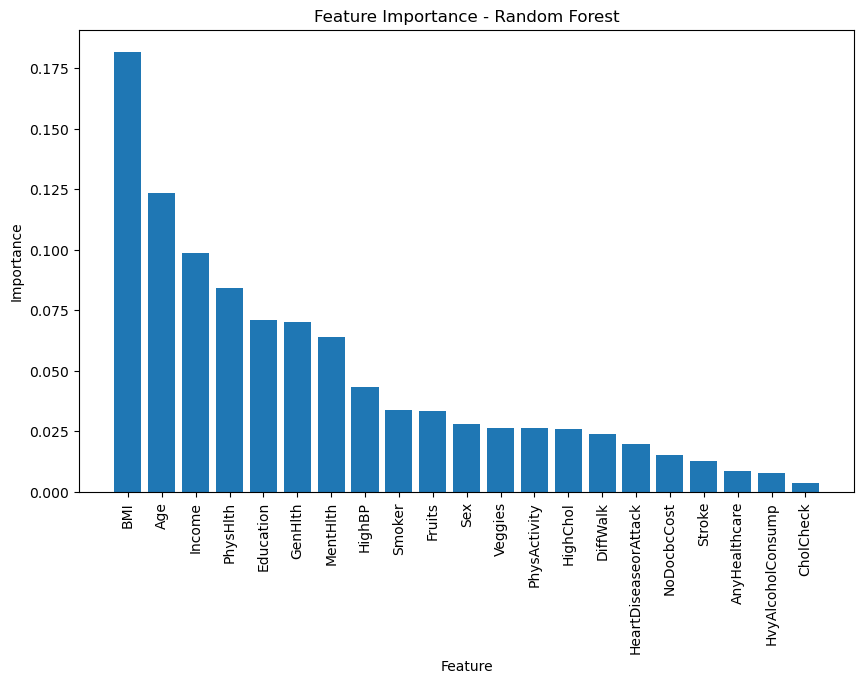

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming X_train and y_train are your training features and target
# Train a Random Forest classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Get feature importances from the trained model
feature_importances = rf_model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importance - Random Forest")
plt.bar(range(X_train.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()


In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

#Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, rf_model.predict_proba(X_test_scaled)[:, 1])

#Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming conf_matrix_rf is the confusion matrix for your Random Forest model
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix Heatmap (Random Forest)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
import matplotlib.pyplot as plt

# Assuming rf_model is your trained Random Forest model
tree_index = 0  # Change this index to extract a different tree from the Random Forest
tree_estimator = rf_model.estimators_[tree_index]

dot_data = export_graphviz(tree_estimator, out_file=None, feature_names=X.columns, class_names=['0', '1'], filled=True)

graph = pydotplus.graph_from_dot_data(dot_data)

plt.figure(figsize=(20, 10))
plt.imshow(plt.imread(graph.create_png()), aspect='auto')
plt.axis('off')
plt.show()
